# 밑바닥부터 시작하는 딥러닝

# Deep Learning from Scratch

## Github 

https://github.com/WegraLee/deep-learning-from-scratch

## 목차

http://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/%EB%AA%A9%EC%B0%A8.ipynb

# 3 신경망
퍼셉트론 좋은 소식: 복잡한 함수도 표현가능

퍼셉트론 나쁜 소식: 가중치를 설정하는 작업을 사람이 수동으로 함

신경망은 이 나쁜 소식을 해결함.

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

입력층, 은닉층, 출력층

신경망의 예 그림

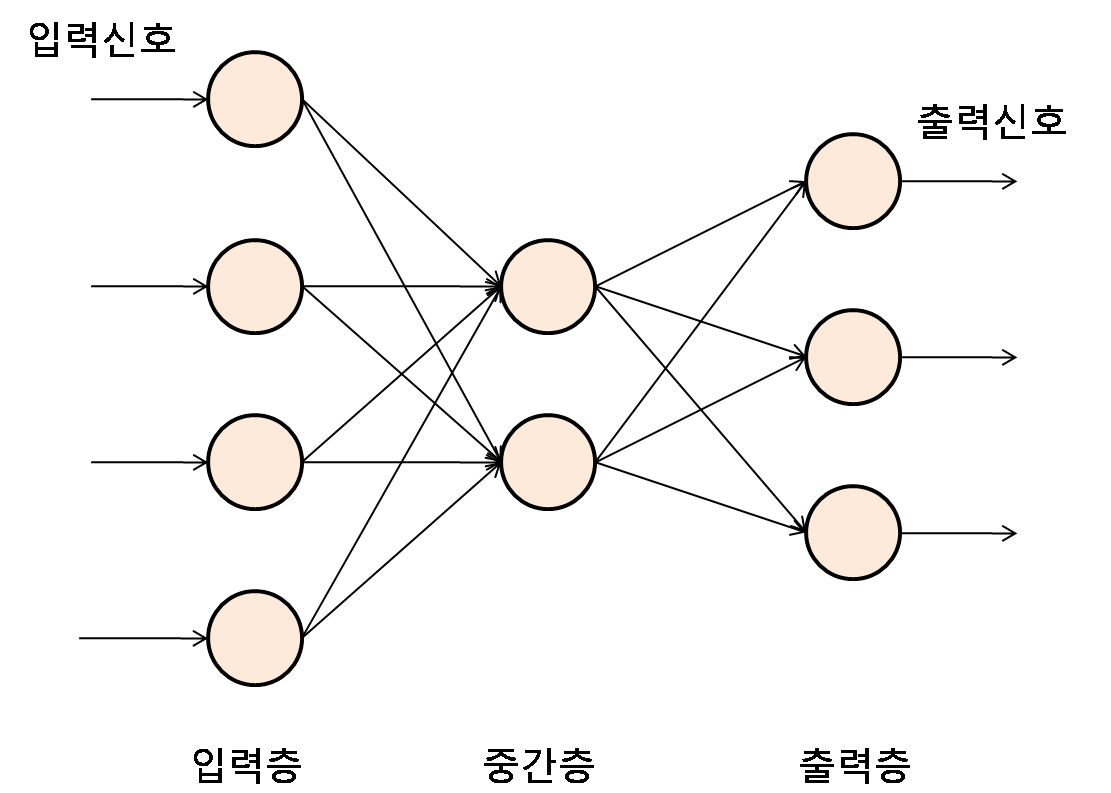

In [1]:
from IPython.display import Image, display
display(Image(filename='neurons.png', embed=True))

위의 그림은 3층으로 구성되지만 가중치를 갖는 층은 2개뿐이기 때문에 '2층 신경망'임.

출처: http://happycontrol.tistory.com/entry/인공신경망1

### 3.1.2 퍼셉트론 복습
x1, x2 두 신호를 입력받아 y를 출력하는 퍼셉트론
\begin{equation*}
y = 0 (b + w_1 x_1 + w_2 x_2 <= 0)
\end{equation*}
\begin{equation*}
y = 1 (b + w_1 x_1 + w_2 x_2 > 0)
\end{equation*}

편향: 뉴런이 얼마나 쉽게 활성화되느냐를 제어

가중치: 신호의 영향력을 제어

편향을 명시한 퍼셉트론(b = -1.5, w1 = 1, w2 = 1)

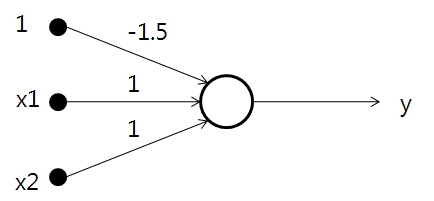

In [2]:
display(Image(filename='perceptron.png', embed=True))

\begin{equation*}
y = h(b + w_1 x_1 + w_2 x_2)
\end{equation*}
입력신호의 총합이 h(x)를 거쳐 그 변환된 값이 y의 출력이 됨

\begin{equation*}
h(x) = 0 (x <=0)
\end{equation*}
\begin{equation*}
h(x) = 1 (x > 0)
\end{equation*}

h(x) 함수는 입력이 0을 넘으면 1을 돌려주고 그렇지 않으면 0을 돌려줌

### 3.1.3 활성화 함수의 등장
활성화 함수 h(x): 입력 신호의 총합을 출력 신호로 변환하는 함수. 활성화를 일으키는 지 정하는 역할.

\begin{equation*}
a = b + w_1 x_1 + w_2 x_2
\end{equation*}
가중치가 달린 입력 신호와 편향의 총합을 계산

\begin{equation*}
y = h(a)
\end{equation*}
a를 h(a) 함수에 넣어 y를 출력하는 흐름

In [3]:
# 그림 3-5!

단순 퍼셉트론: 단층 네트워크에서 계단함수를 활성화 함수로 사용한 모델
다층 퍼셉트론: 신경망(여러 층으로 구성되고 시그모이드 함수 등의 활성화 함수를 사용하는 네트워크)

## 3.2 활성화 함수
계단 함수(step function): 임계값을 경계로 출력이 바뀜

"퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다" 라고 할 수 있음

### 3.2.1 시그모이드 함수
시그모이드 식
\begin{equation*}
h(x) = \frac{1}{1 + exp(-x)} 
\end{equation*}

exp(-x)는 e<sup>-x</sup>, e는 자연상수로 2.7182...

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환.

변환된 신호를 다음 뉴런에 전달.

### 3.2.2 계단 함수 구현하기
계단 함수: 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력

In [4]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

위 구현에서 인수 x는 실수(부동소수점)만 받아들임.

넘파이 배열을 인수로 넣을 수 없음.

In [5]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

위 구현은 넘파이의 트릭을 사용하여 구현. 넘파이 배열도 인수로 넣을 수 있음.

In [6]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [7]:
y = x > 0
y

array([False,  True,  True], dtype=bool)

넘파이 배열에서 부등호 연산을 수행하면 원소 각각에 부등호 연산을 수행한 bool배열이 생성

배열 x의 원소 각각이 0보다 크면 True, 0 이하면 False로 변환한 새로운 배열 y가 생성

In [8]:
y = y.astype(np.int)
y

array([0, 1, 1])

astype() 메서드: 넘파이 배열의 자료형을 변환

파이썬에서는 bool을 int로 변환하면 True는 1로, False는 0으로 변환

### 3.2.3 계단 함수의 그래프
계단 함수: 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력

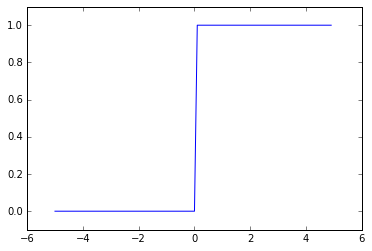

In [9]:
%matplotlib inline 

import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.exp(-x)는 exp(-x) 수식에 해당. 인수 x가 넘파이 배열이어도 올바른 결과가 나옴

In [11]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

브로드캐스트: 넘파이 배열과 스칼라 값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 바꿔 수행

In [12]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([ 2.,  3.,  4.])

In [13]:
1.0 / t

array([ 1.        ,  0.5       ,  0.33333333])

np.exp(-x)가 넘파이 배열을 반환하기 때문에 1 / 1 + np.exp(-x))도 넘파이 배열의 각 원소에 연산을 수행한 결과를 냄

시그모이드 함수 그래프

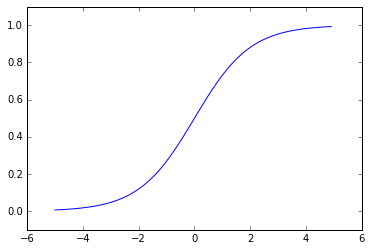

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

시그모이드(sigmoid): 'S자 모양'이라는 뜻

### 3.2.5 시그모이드 함수와 계단 함수 비교
계단 함수(점선)와 시그모이드 함수(실선)

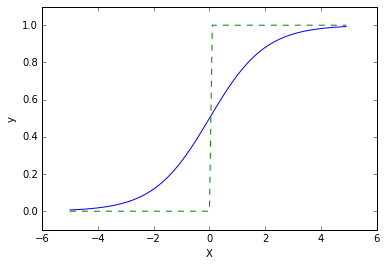

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1, label="sigmoid")
plt.plot(x, y2, linestyle="--", label="step_function")
plt.xlabel("X") # x축 이름
plt.ylabel("y") # y축 이름
plt.ylim(-0.1, 1.1)
plt.show()

계단함수: 0과 1 하나만 돌려줌.

시그모이드 함수: 연속적인 실수가 흐름.

공통점: 입력이 작을 때는 출력은 0에 가깝고 커지면 출력이 1에 가까워짐. 출력은 0에서 1사이.

### 3.2.6 비선형 함수
계단 함수와 시그모이드 함수 모두 비선형 함수

선형함수: 출력이 입력의 상수배만큼 변하는 함수. f(x) = ax + b

비선형함수: 선형이 아닌 함수.

선형함수의 문제는 '은닉층이 없는 네트워크'로 똑같은 기능을 할 수 있음.

층을 쌓는 혜택을 얻고 싶다면 활성화 함수로 반드시 비선형함수를 사용해야 함.

### 3.2.7 ReLU
ReLU(Rectified Linear Unit): 입력이 0을 넘으면 그 입력 그대로 출력. 0 이하면 0을 출력하는 함수.

In [16]:
def relu(x):
    return np.maximum(0, x)

넘파이 maximum 함수: 두 입력 중 큰 값을 선택해 반환하는 함수

ReLU 함수의 그래프

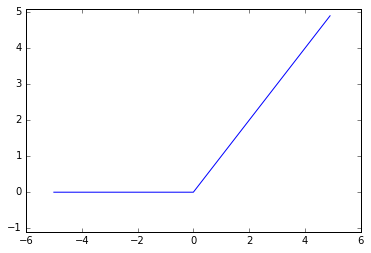

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1) # y축의 범위 지정
plt.show()

ReLU 함수 수식
\begin{equation*}
h(x) = x ( x > 0) 
\end{equation*}
\begin{equation*}
h(x) = 0 ( x <= 0)
\end{equation*}

## 3.3 다차원 배열의 계산
넘파이의 다차원 배열 계산 설명. 신경망 구현.

## 3.3.1 다차원 배열
N차원으로 나열하는 것. 

1차원의 예시

In [18]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


np.ndim(): 배열의 차원 수

shape: 배열의 형상

2차원 배열 예시

In [19]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


처음 차원은 0번째 차원, 다음 차원은 1번째 차원에 대응

행렬: 2차원 배열

## 3.3.2 행렬의 내적(행렬 곱)
행렬의 내적 계산방법

In [20]:
# 그림 3-11!

파이썬 구현 코드

In [21]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

A와 B는 2 X 2 행렬. 

np.dot: 배열 2개를 인수로 받아 두 행렬의 내적을 반환.

np.dot(A, B)와 np.dot(B, A)는 다른 값이 될 수 있음.

2 X 3 행렬과 3 X 2 행렬의 곱 파이썬 구현 코드

In [22]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

행렬의 내적을 구할 때

행렬 A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 원소 수(행 수)가 같아야 함.

위의 예시는 둘 모두 원소가 3개라 같음.

2 X 3 행렬 A와 2 X 2 행렬 C를 곱하면 다음처럼 오류 발생.

In [23]:
C = np.array([[1, 2], [3, 4]])
print(C.shape)
print(A.shape)
np.dot(A, C)

(2, 2)
(2, 3)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

두 행렬의 대응하는 차원의 원소 수를 일치시켜야 함

In [24]:
# 그림 3-12!

A와 B의 대응하는 차원의 원소 수가 같아야 함.

계산 결과인 행렬 C의 형상은 행렬 A의 행수와 행렬 B의 열수가 됨.

A가 2차원 행렬이고 B가 1차원 배열일 때도 '대응하는 차원의 원소 수를 일치시켜라'는 원칙이 똑같이 적용됨.

In [25]:
# 그림 3-13!

In [26]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7, 8])
print(B.shape)
np.dot(A, B)

(3, 2)
(2,)


array([23, 53, 83])

## 3.3.3 신경망의 내적
행렬의 곲으로 신경망의 계산을 수행한다.

In [27]:
# 그림 3-14!

X, W, Y의 형상을 주의깊게 확인

X와 W의 대응하는 차원의 원소 수가 같아야 함

In [28]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


행렬의 내적으로 한꺼번에 계산해주는 기능은 신경망을 구현할 때 매우 중요

## 3.4 3층 신경망 구현하기
넘파이의 다차원 배열을 사용하여 신경망의 순방향 처리

In [29]:
# 그림 3-15!

### 3.4.1 표기법 설명
넘파이의 다차원 배열을 사용하여 신경망의 순방향 처리

In [30]:
# 그림 3-16!

<sup>(1)</sup> : 1층의 가중치

<sub>12</sub> : 다음 층 번호(1), 앞 층 번호(2)

다른 자료에서는 이 순서를 반대로 표기하는 경우도 있음.

### 3.4.2 표기법 설명

In [31]:
# 그림 3-17!

a<sub>1</sub><sup>(1)</sup> 의 수식

\begin{equation*}
a^{(1)}_{1} = w^{(1)}_{11} + w^{(1)}_{12} + b^{(1)}_{1}
\end{equation*}

행렬의 내적을 이용 1층의 '가중치 부분'을 다음 식처럼 간소화

\begin{equation*}
A^{(1)} = XW^{(1)} + B^{(1)}
\end{equation*}

행렬의 값

\begin{equation*}
A^{(1)} = (a^{(1)}_{1} a^{(1)}_{2} a^{(1)}_{3}), X = (x_{1} x_{2}), B^{(1)} = (b^{(1)}_{1} b^{(1)}_{2} b^{(1)}_{3})
\end{equation*}

\begin{equation*}
W^{(1)} = \begin{vmatrix}
\mathbf{w^{(1)}_{11}} & \mathbf{w^{(1)}_{21}} & \mathbf{w^{(1)}_{31}} \\
\mathbf{w^{(1)}_{12}} & \mathbf{w^{(1)}_{22}} & \mathbf{w^{(1)}_{32}} \\
\end{vmatrix}
\end{equation*}


In [32]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(B.shape)  # (2, 3)
print(X.shape)  # (2,)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(2,)


In [33]:
# 그림 3-18!

활성화 함수를 시그모이드를 사용.

파이썬 구현 코드

In [34]:
Z1 = sigmoid(A1)

print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


1층에서 2층으로의 신호 전달

In [35]:
# 그림 3-19!

In [36]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


2층에서 출력층으로 신호 전달. 활성화 함수만 지금까지 은닉층과 다름. (항등 함수)

2층에서 출력층으로의 신호 전달

In [37]:
# 그림 3-20!

In [38]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

항등 함수 identity_function 정의. 입력을 그대로 출력하는 함수.

출력층의 활성화 함수를 다음처럼 표시하여 은닉층의 h()와는 다르게 표시.

\begin{equation*}\sigma()\end{equation*}

출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함.

회귀 => 항등함수

2클래스 분류 => 시그모이드 함수

다중 클래스 분류 => 소프트맥스 함수

### 3.4.3 구현 정리
가중치는 대문자, 편향, 중간결과는 소문자로 표기함.

In [39]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]

[ 0.31682708  0.69627909]


init_network() : 가중치와 편향을 초기화하고 딕셔너리 변수인 network에 저장

forward() : 입력 신호를 출력으로 변환하는 처리과정 모두 구현

forward 의미는 신호가 순방향(입력에서 출력방향)으로 전달됨을 알림

역방향(backward, 출력에서 입력 방향) 처리에 대해서도 살펴볼 계획

## 3.5 출력층 설계하기
신경망은 분류, 회귀 모두 이용가능

일반적으로 회귀에는 항등 함수, 분류에는 소프트맥스 함수를 사용.

분류: 데이터가 어느 클래스(class)에 속하느냐는 문제

회귀: 입력 데이터에서 (연속적인) 수치를 예측하는 문제

<pre>
19세기 후반 영국의 우생학자 골턴 경은 사람과 완두콩 등을 대상으로 그 키를 측정. 관찰 결과 키가 큰 부모의 자식은 부모보다 작고 작은 부모의 자식은 부모보다 큰, 즉 평균으로 회귀(regression)하는 경향을 발견. 그 사이에는 선형 관계가 있어 부모의 키로부터 자식의 키를 예측할 수 있고 그 예측 결과값이 연속적인 수치임.
</pre>

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
항등함수: 입력 그대로 출력

In [40]:
# 그림 3-21

소프트맥스 함수

\begin{equation*}
y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n} exp(a_{i})}
\end{equation*}

exp(x)는 지수함수(exponential function)

n은 출력층의 뉴런수. yk는 그중 k번째 출력임을 뜻함.

소프트맥스의 분자는 입력 신호 ak의 지수 함수.

분모는 모든 입력신호의 지수 함수의 합으로 구성.

소프트 맥스의 출력은 모든 입력 신호로부터 화살표를 받음.

In [41]:
# 그림 3-22

소프트맥스 함수 구현

In [42]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


소프트맥스 함수 정의

In [43]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점
컴퓨터로 소프트맥스를 계산할 때 오버플로 문제 발생가능

오버플로(Overflow) : 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없음

소프트맥스 함수 개선한 수식

\begin{equation*}
y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n} exp(a_{i})} = \frac{C exp(a_{k})}{C \sum_{i=1}^{n} exp(a_{i})}
\end{equation*}

\begin{equation*}
= \frac{exp(a_{k}+logC)}{\sum_{i=1}^{n} exp(a_{i}+logC)}
\end{equation*}

\begin{equation*}
= \frac{exp(a_{k}+C')}{\sum_{i=1}^{n} exp(a_{i}+C')}
\end{equation*}

첫 번째 번형에서 C라는 임의의 정수를 분자와 분보 양쪽에 곱함

C를 지수 함수 exp() 안으로 옮겨 logC로 만듬

logC를 C'라는 새로운 기호로 바꿈

소프트맥스의 지수 함수를 계산할 어떤 정수를 더해도 (혹은 빼도) 결과는 바뀌지 않음

오버플로를 막을 목적으로는 입력 신호 중 최대값을 이용하는 것이 일반적

오버플로 막는 예시

In [44]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산
# array([ nan,  nan,  nan])   # 제대로 계산되지 않는다.

/Users/donglyeolsin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/donglyeolsin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([ nan,  nan,  nan])

In [45]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [46]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

소프트맥스 함수 다시 구현

In [47]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.3 소프트맥스 함수의 특징
softmax() 함수를 사용하면 신경망의 출력은 다음과 같이 계산 가능

In [48]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[ 0.01821127  0.24519181  0.73659691]


1.0

소프트맥스 함수 출력의 총합은 1. 출력을 '확률'로 해석할 수 있음.

y[0]의 확률 0.018(1.8%), y[1]의 확률 0.245(24.5%), y[2]의 확률 0.737(73.7%)로 해석가능

"2번째 원소의 확률이 가장 높으니, 답은 2번 클래스다"

소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 됨

소프트맥스를 적용해도 각 원소의 대소 관계는 변하지 않음

이유: 단조 증가함수(a<=b일 때 f(a)<=f(b)가 성립하는 함수)이기 때문

추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적

학습 시킬 때에는 출력층에서 소프트맥스 함수를 사용

### 3.5.4 출력층의 뉴런 수 정하기
분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적

이미지를 숫자 0부터 9 중 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정

In [49]:
# 그림 3-23!

출력층 뉴런은 위에서부터 차례로 0, 1, ..., 9에 대응.

이 신경망이 선택한 클래스는 y2, 입력 이미지를 숫자 '2'로 판단했음을 의미

## 3.6 손글씨 숫자 인식
추론 과정: 신경망의 순전파(forward propagation)

신경망 문제 해결 2단계

학습단계: 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수를 학습

추론단계: 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류

### 3.6.1 MNIST 데이터셋
MNIST: 손글씨 숫자 이미지 집합

0부터 9까지의 숫자 이미지로 구성

훈련 이미지가 60000장, 시험 이미지가 10000장 준비됨

훈련 이미지로 모델을 학습. 시험 이미지들을 얼마나 정확하게 분류하는지를 평가함

MNIST의 이미지 데이터는 28 X 28 크기의 회색조 이미지, 각 픽셀 값은 0~255. 각 이미지에는 실제 의미하는 숫자가 레이블로 붙어 있음.

In [50]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


부모 디렉터리의 파일을 가져오고 dataset/mnist.py의 lost_mnist함수를 import함

load_mnist 함수로 데이터셋을 읽음

최초 실행시 인터넷에 연결된 상태여야 함

두 번째부터는 로컬에 저장된 pickle 파일을 읽기 때문에 순식간에 끝남.

load_mnist 함수는 읽은 MNIST 데이터를 "(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)" 형식으로 반환

load_mnist 인수

normalize 입력 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할 지 결정

flatten 1차원 배열로 할지 여부. False면 1X28X28의 3차원 배열, True면 784개의 원소로 이뤄진 1차원 배열로 저장

one_hot_lable 원-핫 인코딩(one-hot encoding). 정답을 뜻하는 원소만 1이고 나머지는 모두 0인 배열.

파이썬 pickle: 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능. pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원가능

MNIST 이미지를 화면에 불러오기

참고주소: http://qiita.com/Tatejimaru137/items/44646c9bb3799768fa81

5
(784,)
(28, 28)


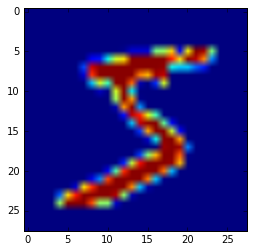

In [51]:
%matplotlib inline
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #pil_img.show()
    plt.imshow(np.array(pil_img))
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]

print(label) # 5

print(img.shape)          # (784,)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)          # (28, 28)

img_show(img)

reshape() 메서드: 원하는 형상을 인수로 지정하면 넘파이 배열의 형상을 변환가능

### 3.6.2 신경망의 추론 처리
입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성

첫 번째 은닉층은 50개의 뉴런, 두 번째 은닉층은 100개의 뉴런을 배치

In [52]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

init_network(): pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽음

정확도(accuracy, 분류가 얼마나 올바른가) 평가

In [53]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻음
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


predict() : 각 레이블의 확률을 넘파이 배열로 반환
    
np.argmax() : 가장 큰(확률이 가장 높은) 원소의 인덱스를 구함 => 예측 결과

신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자(accuracy_cnt)를 세고, 전체 이미지 숫자로 나눠 정확도 계산

normalize를 True로 설정. 각 픽셀의 값을 0.0~1.0 범위로 변환.

정규화(normalize) : 데이터를 특정 범위로 변환하는 처리

전처리(pre-processing) : 신경망의 입력 데이터에 특정 변환을 가하는 것

전처리, 정규화 예시

데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동시킴

데이터의 확산 범위를 제한하는 정규화를 수행

전체 데이터를 균일하게 분포시키는 데이터 백색화(whitening)

### 3.6.3 배치 처리
각 층의 가충치 형상을 출력

In [54]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [55]:
x[0].shape

(784,)

In [56]:
W1.shape

(784, 50)

In [57]:
W2.shape

(50, 100)

In [58]:
W3.shape

(100, 10)

최종 결과는 원소가 10개인 1차원 배열 y가 출력됨

In [59]:
# 그림 3-26!

위는 데이터를 1장만 입력했을 때의 처리 흐름

In [60]:
# 그림 3-27!

입력 데이터 형상은 100 X 784, 출력 데이터 형상은 100 X 10

100장 분량 입력 데이터의 결과가 한 번에 출력됨

배치: 하나로 묶은 데이터

배치처리 이점 : 이미지 1장당 처리 시간을 대폭 줄임

* 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 계싼

* 버스에 주는 부하를 줄임. (CPU, GPU로 순수 계산을 수행하는 비율이 높아짐)

배치 처리 구현

In [61]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


range(start, end, step) 처럼 인수를 3개 지정하면 start에서 end-1까지 step 간격으로 증가하는 리스트를 반환

In [62]:
list( range(0, 10) )

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [63]:
list( range(0, 10, 3) )

[0, 3, 6, 9]

x[i:i+batch_n]은 입력 데이터 i번째부터 i+batch_n번째까지 데이터를 묶는다는 의미

batch_size가 100이므로 x[0:100], x[100:200]와 같이 100장씩 묶어 꺼내게 됨

argmax(): 최대값의 인덱스를 가져옴

axis=1 인수를 추가. 100 X 10의 배열 중 1번째 차원을 구성하는 각 원소에서(1번째 차원을 축으로) 최대값의 인덱스를 검색

argmax axis 예시

In [64]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
y

array([1, 2, 1, 0])

배치 단위로 분류된 결과를 실제 답과 비교. == 연산자 사용

넘파이 배열끼리 비교하여 True/False로 구성된 bool 배열을 만들고 True가 몇 개인지 셈.

True 개수 세는 예제

In [65]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3

## 3.7 정리
신경망의 순전파를 살펴봄

신경망에서는 매끄럽게 변화하는 시그모이드 함수를, 퍼셉트론에서는 갑자기 변화하는 계단함수를 활성화 함수로 사용

이 차이가 중요함. 다음 장에서 설명

이번 장에서 배운 내용

신경망에서는 활성화 함수로 시그모이드, ReLU 함수 같은 매끄럽게 변화하는 함수를 이용

넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현 가능

기계학습 문제는 크게 회귀, 분류로 나눌 수 있음

출력층의 활성화 함수로 회귀에서는 주로 항등 함수, 분류에서는 주로 소프트맥스 함수를 이용

분류에서는 출력층의 뉴런 수로 분류하는 클래스 수와 같게 설정

입력 데이터를 묶은 것을 배치. 추론 처리를 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있음.